In [6]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


# Import train_test_split.
from sklearn.linear_model import LogisticRegression

# Import logistic regression

In [7]:
# Import Data

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Potential features to engineer

In [8]:
# import data

merge_df = pd.read_csv('../data/merged_train_outer.csv')

In [9]:
# import data
# match traps
train = pd.read_csv('../data/train.csv')
train.columns = [x.lower() for x in list(train.columns)]

# find traps
trap = train[['trap', 'longitude', 'latitude']]
trap = trap.groupby(['trap', 'longitude', 'latitude'], as_index=False).count()

In [10]:
# create basic features

merge_df['date']=pd.to_datetime(merge_df['date'])
merge_df['month'] = merge_df['date'].dt.month
merge_df['week'] = merge_df['date'].dt.week

merge_df = merge_df.merge(trap, how='left', on = ['latitude', 'longitude'])
merge_df['hl'] = merge_df['year'].map(lambda x : 1 if x in [2007, 2013] else 0)

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [26]:
#merge_df_1 = merge_df.loc[merge_df['year'].isin([2007, 2013]), :].copy()
#merge_df_1['hl'] = merge_df_1['year'].map(lambda x : 1 if x == 2013 else 0)
# merge_df['jul'] = merge_df['month'].map(lambda x : 1 if x == 7 else 0)
# merge_df['jul_int'] = merge_df['jul']*merge_df['preciptotal']

In [11]:
betw_year = merge_df[['trap', 'year', 'wnvpresent', 'wnvcount']]

In [12]:
betw_year = betw_year.loc[betw_year['wnvpresent']>0,:]

In [13]:
# clear independent effects of year
# IE MOSQUITOS THRIVE IN SPECIFIC YEARS

betw_year.groupby('year').sum()

,wnvpresent,wnvcount
year,,
2007,189.0,236.0
2009,19.0,19.0
2011,50.0,57.0
2013,199.0,239.0


In [24]:
betw_year

,trap,year,wnvpresent,wnvcount,wnvpresent_1
164,T900,2013,15.0,46.0,1
22,T013,2013,8.0,8.0,1
149,T225,2013,8.0,8.0,1
6,T003,2013,7.0,7.0,1
31,T030,2013,7.0,8.0,1
...,...,...,...,...,...
118,T152,2007,1.0,1.0,1
123,T156,2007,1.0,1.0,1
124,T158,2007,1.0,1.0,1
132,T162,2007,1.0,1.0,1


In [14]:
# inspect location hotspots BY YEAR
# which traps have mosquitos? Weighted by appearance across years

betw_year = betw_year.groupby(['trap', 'year'], as_index=False)[['wnvpresent', 'wnvcount']]\
.sum().sort_values(['year','wnvpresent'], ascending=False)

In [15]:
# IE MOSQUITOS THRIVE IN SPECIFIC LOCATIONS

betw_year['wnvpresent_1'] = betw_year['wnvpresent'].map(lambda x: 1 if x >0 else 0)

betw_year.groupby(['trap'])['wnvpresent','wnvcount', 'wnvpresent_1'].sum()\
.sort_values('wnvpresent_1', ascending=False)

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,wnvpresent,wnvcount,wnvpresent_1
trap,,,
T002,15.0,18.0,4
T090,7.0,7.0,4
T095,5.0,5.0,4
T158,5.0,6.0,4
T028,9.0,9.0,3
...,...,...,...
T145,1.0,1.0,1
T147,4.0,4.0,1
T045,3.0,3.0,1


In [16]:
sum(betw_year.groupby(['trap'])['wnvpresent','wnvcount', 'wnvpresent_1'].sum()\
.sort_values('wnvpresent_1', ascending=False)['wnvpresent_1']>0)

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


97

97 traps which have at least 1 mosquito caught
option to include 1 continuous variable with trap location

In [17]:
betw_year.groupby(['trap'])['wnvpresent','wnvcount', 'wnvpresent_1'].sum()\
.sort_values('wnvpresent_1', ascending=False)

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,wnvpresent,wnvcount,wnvpresent_1
trap,,,
T002,15.0,18.0,4
T090,7.0,7.0,4
T095,5.0,5.0,4
T158,5.0,6.0,4
T028,9.0,9.0,3
...,...,...,...
T145,1.0,1.0,1
T147,4.0,4.0,1
T045,3.0,3.0,1


In [18]:
betw_year_add = betw_year.groupby(['trap'])['wnvpresent','wnvcount', 'wnvpresent_1', 'year'].sum()\
.sort_values(['wnvpresent_1', 'year'], ascending=False)

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [19]:
betw_year_add

,wnvpresent,wnvcount,wnvpresent_1,year
trap,,,,
T002,15.0,18.0,4,8040
T090,7.0,7.0,4,8040
T095,5.0,5.0,4,8040
T158,5.0,6.0,4,8040
T013,10.0,10.0,3,6033
...,...,...,...,...
T162,1.0,1.0,1,2007
T200,1.0,1.0,1,2007
T209,3.0,3.0,1,2007


In [20]:
# IE MOSQUITOS THRIVE IN SPECIFIC COMBINATION of Years

betw_year_add.groupby('year').sum().sort_values(['wnvpresent_1'], ascending=False)

,wnvpresent,wnvcount,wnvpresent_1
year,,,
4020,94.0,100.0,38
2007,85.0,99.0,33
6031,70.0,97.0,24
2013,53.0,56.0,17
8040,32.0,36.0,16
6033,62.0,99.0,15
6029,26.0,29.0,9
4018,5.0,5.0,4
4022,8.0,8.0,4


# Groupings

In [80]:
# Group 1

For each trap, (~top 20%)

Across years: wnvpresent 
    > wnvpresent 8 times (17 traps) ay_8nabov
    > wnvpresent 6 times (25 traps) ay_6nabov
    
Across years: Appear in 
    at least 3 of 4 years (20 traps) ay_3of4
    at least 2 of 4 years (46 traps) ay_2of4

Within years: wnvpresent at least 4
2007 (19 traps) wy_2007_4nabv
2009 (0 traps)  0
2011 (3 traps)  wy_2011_4nabv
2013 (22 traps) wy_2013_4nabv


Within years: wnvpresent at least 3
2007 (27 traps) wy_2007_3nabv
2009 (0 traps)  0
2011 (4 traps)  wy_2011_3nabv
2013 (33 traps) wy_2013_3nabv

SyntaxError: invalid syntax (4289086942.py, line 3)

In [163]:
wy_2007_3nabv.shape

(27,)

In [157]:
group_1 = list(ay_6nabov)
group_1.extend(ay_3of4)
group_1.extend(wy_2007_4nabv)
group_1.extend(wy_2011_4nabv)
group_1.extend(wy_2013_4nabv)
len(list(set(group_1)))


43

In [158]:
group_2 = list(ay_6nabov)
group_2.extend(ay_3of4)
group_2.extend(wy_2007_3nabv)
group_2.extend(wy_2011_3nabv)
group_2.extend(wy_2013_3nabv)
len(list(set(group_2)))

55

In [159]:
group_3 = list(ay_6nabov)
group_3.extend(ay_2of4)
group_3.extend(wy_2007_3nabv)
group_3.extend(wy_2011_3nabv)
group_3.extend(wy_2013_3nabv)
len(list(set(group_3)))

68

In [79]:
betw_year.loc[(betw_year['year']==2007) & (betw_year['wnvpresent']>3),:]\
.sort_values('wnvpresent', ascending=False).shape

(19, 5)

In [165]:
betw_year.groupby(['trap'])['wnvpresent','wnvcount', 'wnvpresent_1'].sum()\
.sort_values(['wnvpresent_1', 'wnvpresent'], ascending=False)[:46]

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,wnvpresent,wnvcount,wnvpresent_1
trap,,,
T002,15.0,18.0,4
T090,7.0,7.0,4
T095,5.0,5.0,4
T158,5.0,6.0,4
T900,29.0,66.0,3
T115,15.0,41.0,3
T003,14.0,14.0,3
T011,11.0,11.0,3
T225,11.0,11.0,3


In [135]:
betw_year.groupby(['trap'])['wnvpresent','wnvcount', 'wnvpresent_1'].sum()\
.sort_values('wnvpresent', ascending=False)[:25]

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,wnvpresent,wnvcount,wnvpresent_1
trap,,,
T900,29.0,66.0,3
T002,15.0,18.0,4
T115,15.0,41.0,3
T003,14.0,14.0,3
T225,11.0,11.0,3
T011,11.0,11.0,3
T013,10.0,10.0,3
T028,9.0,9.0,3
T223,9.0,9.0,2


In [ ]:
# Tier 1

In [150]:
wy_2011_3nabv = betw_year.loc[(betw_year['year']==2011) & (betw_year['wnvpresent']>2),:]\
.sort_values('wnvcount', ascending=False)['trap']

In [ ]:
wy_2013_3nabv = 
wy_2007_3nabv = 
wy_2007_3nabv = 

In [37]:
betw_year.loc[(betw_year['year']==2009)
              #& (betw_year['wnvcount']>2)
              ,:].sort_values('wnvcount', ascending=False)

,trap,year,wnvpresent,wnvcount,wnvpresent_1
90,T095,2009,2.0,2.0,1
162,T900,2009,2.0,2.0,1
165,T903,2009,2.0,2.0,1
1,T002,2009,1.0,1.0,1
13,T009,2009,1.0,1.0,1
16,T011,2009,1.0,1.0,1
20,T013,2009,1.0,1.0,1
32,T031,2009,1.0,1.0,1
83,T090,2009,1.0,1.0,1
95,T102,2009,1.0,1.0,1


In [38]:
betw_year.loc[(betw_year['year']==2011)
              & (betw_year['wnvcount']>2)
              ,:].sort_values('wnvcount', ascending=False)

,trap,year,wnvpresent,wnvcount,wnvpresent_1
163,T900,2011,12.0,18.0,1
166,T903,2011,7.0,8.0,1
144,T223,2011,5.0,5.0,1
5,T003,2011,3.0,3.0,1


In [39]:
betw_year.loc[(betw_year['year']==2013)
              & (betw_year['wnvcount']>2)
              ,:].sort_values('wnvcount', ascending=False)

,trap,year,wnvpresent,wnvcount,wnvpresent_1
164,T900,2013,15.0,46.0,1
3,T002,2013,6.0,8.0,1
149,T225,2013,8.0,8.0,1
22,T013,2013,8.0,8.0,1
31,T030,2013,7.0,8.0,1
159,T233,2013,6.0,7.0,1
160,T235,2013,7.0,7.0,1
6,T003,2013,7.0,7.0,1
27,T027,2013,6.0,6.0,1
30,T028,2013,6.0,6.0,1


In [26]:
betw_year.groupby(['trap'])['wnvpresent','wnvcount'].sum()\
.sort_values('wnvpresent', ascending=False)[:30]

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,wnvpresent,wnvcount
trap,,
T900,29.0,66.0
T002,15.0,18.0
T115,15.0,41.0
T003,14.0,14.0
T225,11.0,11.0
T011,11.0,11.0
T013,10.0,10.0
T028,9.0,9.0
T223,9.0,9.0


In [ ]:
train_1 = merge_df.loc[merge_df['month']==8,:]

x = train_1[['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+',
       'fu', 'hz', 'mi', 'ra', 'sn', 'sq', 'ts', 'vc']]
y = train_1['hl']

In [ ]:
# Step 2: Instantiate our model.
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(x, y)

In [ ]:
logreg.score(x, y)

In [ ]:
pd.DataFrame(data = logreg.coef_,
             columns = list(x.columns)).T.sort_values(0)

In [ ]:
train_1.groupby(['hl', 'week']).mean().T

In [ ]:
train_1[['ra', 'preciptotal']]

In [ ]:
merge_df = pd.read_csv('../data/merged_train_outer.csv')

In [8]:
train_1 = merge_df.copy()

In [10]:
co = ['date', 'latitude', 'longitude', 'station', 'sprayed', 'tmax', 'tmin', 'tavg',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'codesum', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'month', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+', 'fu', 'hz',
       'mi', 'ra', 'sn', 'sq', 'ts', 'vc', 'gr', 'year', 'trap']

In [11]:
train_2= train_1.drop('species', axis=1)

train_2 = train_2.groupby(co, as_index=False).sum()

In [12]:
train_2['wnvpresent'] = train_2['wnvpresent'].map(lambda x: 1 if x > 0 else 0)

In [13]:
train_2['date'] = pd.to_datetime(train_2['date'])
train_2['month'] = train_2['date'].dt.month
train_2['week'] = train_2['date'].dt.week

C:\Users\User\.conda\envs\dsi27tf\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
train_2['week']

0       22
1       22
2       22
3       22
4       22
        ..
4611    39
4612    39
4613    39
4614    39
4615    39
Name: week, Length: 4616, dtype: int64

In [15]:
train_3 = train_2.loc[train_2['month']==8,:]

In [16]:
train_4 = train_2.loc[train_2['year'].isin([2007, 2013]),:]
train_4.groupby(['year', 'month','week'], as_index=False)[['wnvcount']].sum()[0:35]

,year,month,week,wnvcount
0,2007,5,22,0.0
1,2007,6,23,0.0
2,2007,6,26,0.0
3,2007,7,27,0.0
4,2007,7,28,0.0
5,2007,7,29,1.0
6,2007,7,30,5.0
7,2007,8,31,21.0
8,2007,8,32,20.0
9,2007,8,33,60.0


In [17]:
# Create a dataframe for each year with lat long and the cumulative occurence of virus
# col_w.remove('species')
to_keep = ['date', 'latitude', 'longitude', 'wnvpresent']

train_plot = train_2[to_keep].copy()

train_plot['date'] = pd.to_datetime(train_plot['date']) # convert date type
train_plot['year'] = train_plot['date'].dt.year         # create another column of date
train_plot.drop(columns='date', inplace=True)


train_plot = train_plot.groupby(['year', 'latitude', 'longitude']).sum() # collapse rows that have same values in columns col_w
train_plot.reset_index(inplace=True)    # create new df from those collapsed rows

train_plot.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       }, inplace=True)

train_plot_2007 = train_plot.loc[train_plot['year']==2007, :]
train_plot_2009 = train_plot.loc[train_plot['year']==2009, :]
train_plot_2011 = train_plot.loc[train_plot['year']==2011, :]
train_plot_2013 = train_plot.loc[train_plot['year']==2013, :]

Text(0.5, 1.0, 'Traps with WNV - 2013')

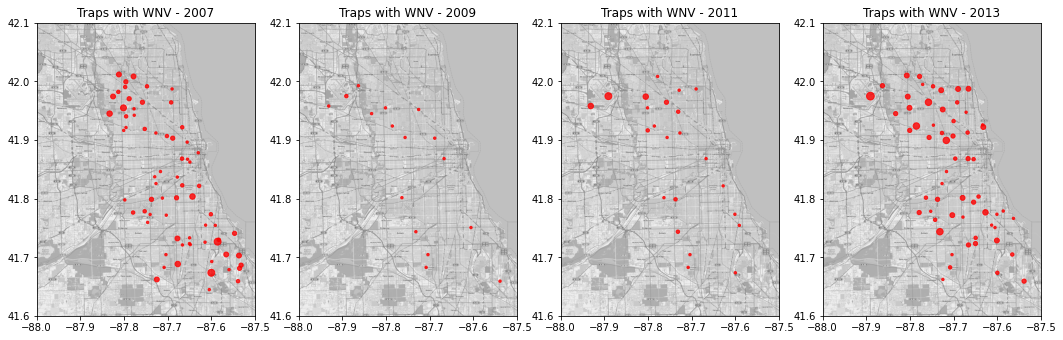

In [18]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)


# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [19]:
train_plot_2007_top = train_plot_2007.sort_values('wnvcount', ascending=False)[:5]
train_plot_2009_top = train_plot_2009.sort_values('wnvcount', ascending=False)[:5]
train_plot_2011_top = train_plot_2011.sort_values('wnvcount', ascending=False)[:5]
train_plot_2013_top = train_plot_2013.sort_values('wnvcount', ascending=False)[:5]

Text(0.5, 1.0, 'Traps with WNV - 2013')

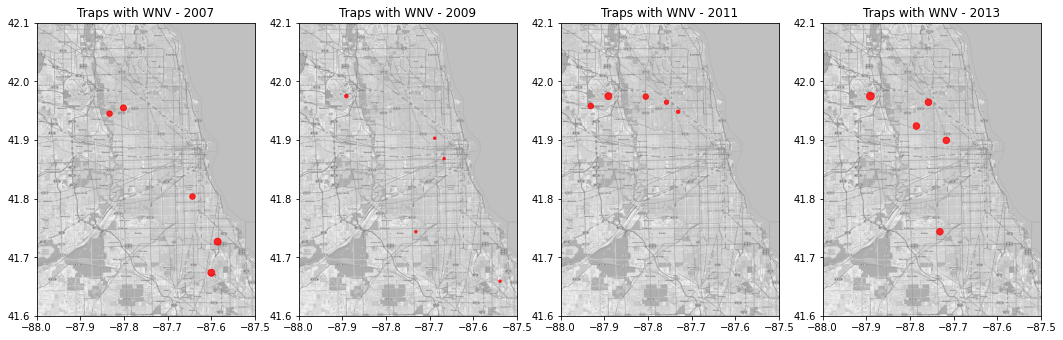

In [20]:
# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007_top.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009_top.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011_top.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013_top.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [86]:
test.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [180]:
v = train[['trap', 'longitude', 'latitude']]

In [193]:
trap = v.groupby(['trap', 'longitude', 'latitude'], as_index=False).count()